# Session IV: System Calls and Plotting

In [12]:
import os, glob

In [19]:
for files in os.listdir():
    if 'py' in files:
        

.git
.gitignore
.ipynb_checkpoints
basic_script.py
basic_template.py
binder
CODE_OF_CONDUCT.md
datasets
figures
index.ipynb
LICENSE
README.md
session1.ipynb
session2.ipynb
session3.ipynb
session4.ipynb
utils


---
### Session III Challenge

In [7]:
%%writefile ./utils/blah.py
#!/usr/bin/env python
""" Compares two ages

Finds the difference of years between an age and a birthdate

Usage: python basic_template.py 9001 12

Args:
    (str): age of the navigator
    (str): age of the driver

Returns:
    (int): difference of age in years

"""
import sys

print('Hello, Me!')
        
def main(navigator_age, driver_age):
    """ Finds the difference between an age and birthdate in years
    
    Args:
        navigator_age (int): age of the navigator
        driver_age (int): age of the driver
    
    Returns:
        Difference in age
    """
    diff = abs(navigator_age - driver_age)
    print(f'Difference of {diff} years')
    return diff
            
    
if __name__ == '__main__':
    n_age = int(sys.argv[1])
    d_age = int(sys.argv[2])
    main(n_age, d_age)

Overwriting ./utils/blah.py


In [1]:
from utils import blah

Hello, Me!


In [2]:
!python ./utils/blah.py 9001 19

Hello, Me!
Difference of 8982 years


---

## System Calls

Like it was stated before. One of the biggest strengths of Python is its ability to 'glue' together many programs. This can be done though different APIs and libraries. However, some programs don't have an easy solution like that. For those, we use **system calls**.

Where we have run Python from the command line, it is possible to run the command line from Python. Here are some ways to use it.

In [1]:
from subprocess import run, PIPE

The whole API for system calls can be found [here](https://docs.python.org/3/library/subprocess.html) or:

In [3]:
?run()

Signature: run(*popenargs, input=None, timeout=None, check=False, **kwargs)
Docstring:
Run command with arguments and return a CompletedProcess instance.

The returned instance will have attributes args, returncode, stdout and
stderr. By default, stdout and stderr are not captured, and those attributes
will be None. Pass stdout=PIPE and/or stderr=PIPE in order to capture them.

If check is True and the exit code was non-zero, it raises a
CalledProcessError. The CalledProcessError object will have the return code
in the returncode attribute, and output & stderr attributes if those streams
were captured.

If timeout is given, and the process takes too long, a TimeoutExpired
exception will be raised.

There is an optional argument "input", allowing you to
pass a string to the subprocess's stdin.  If you use this argument
you may not also use the Popen constructor's "stdin" argument, as
it will be used internally.

The other arguments are the same as for the Popen constructor.

If universa

**Fair Warning**: it is long!

The general idea of using `run()` is to give it all the information it needs to send to the command line, and whether or not to capture the output.

In [6]:
# When would you not need to save the output?
run('mkdir ./tickle', shell=True) # That is fun, but I don't want that directory anymore
run('rm -rf ./tickle', shell=True)

CompletedProcess(args='rm -rf ./tickle', returncode=0)

In [11]:
job.args

'ls | grep CODE'

In [4]:
# When would be a time you would want to store the output?
job = run('ls | grep CODE', shell=True, universal_newlines=True, stdout = PIPE)
job.stdout

'CODE_OF_CONDUCT.md\n'

What is `shell`, and why is it set to `True`?

It is as easy as that. 

Just like command line arguments, the shell returns what ***kind*** of object?

In [12]:
type(job.stdout)

str

---

## Tabular data analysis with `pandas`

`pandas` is Python's answer to R's `data.frame`. It exposes the `DataFrame` data structure, which is described as a "two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns)"

`pandas` is a ***whole lot more*** than `DataFrame`, but for anybody that has used R, this is one of the most important parts of `pandas`.

In [13]:
# standard pandas importing convention
import pandas as pd

/root/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/root/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Don't worry about those warnings, they are just an artifact of the environment we are working on.

Remember all the file handling stuff we did earlier, where you had to run through each line? Watch this...

In [14]:
pokemon = pd.read_csv('./datasets/pokemon.csv', index_col=0)

In [15]:
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [16]:
# What pokemon have the highest base attack rating?
pokemon.sort_values('Attack', ascending=False)[:10]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
445,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False
475,GalladeMega Gallade,Psychic,Fighting,618,68,165,95,65,115,110,4,False
354,BanetteMega Banette,Ghost,NaN,555,64,165,75,93,83,75,3,False


In [27]:
pokemon.HP.std()

25.534669032332047

What about tab-separated values?

In [17]:
weather = pd.read_table('./datasets/weather.tsv', delimiter='\t').dropna(axis=1, how='all', thresh=800)

In [18]:
weather.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS
0,US1MIWS0042,ANN ARBOR 4.5 W\t MI US,42.2781,-83.8188,278.6,2017-08-01,0.00,0.0,NaN,NaN,NaN,NaN
1,US1MIWS0042,ANN ARBOR 4.5 W\t MI US,42.2781,-83.8188,278.6,2017-08-02,0.00,0.0,NaN,NaN,NaN,NaN
2,US1MIWS0042,ANN ARBOR 4.5 W\t MI US,42.2781,-83.8188,278.6,2017-08-03,0.24,0.0,NaN,NaN,NaN,NaN
3,US1MIWS0042,ANN ARBOR 4.5 W\t MI US,42.2781,-83.8188,278.6,2017-08-04,0.21,NaN,NaN,NaN,NaN,NaN
4,US1MIWS0042,ANN ARBOR 4.5 W\t MI US,42.2781,-83.8188,278.6,2017-08-05,0.00,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Exploring some statistics


Even plays well with Excel

In [19]:
ramen = pd.read_excel('./datasets/ramen-ratings.xlsx')

In [20]:
ramen.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten Year,Top Ten Place
0,1,Westbrae,Miso Ramen,Pack,USA,0.5,NaN,NaN
1,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,NaN,NaN
2,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,NaN,NaN
3,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,NaN,NaN
4,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN,NaN


### An extended version of my `pandas` tutorial can be found [here](https://github.com/betteridiot/b575w18/blob/master/Pandas.ipynb)

---

## Data Visualization

Data is great, but unless we can determine trends in it, it is useless. One of the most efficient ways to provide evidence of these trends is data visualization. This is just a graphic representation of the data.

In [28]:
%matplotlib inline
# This first line is special magic just for notebooks that let us see the plots as we make them

import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Also, we are going to want to generate some data
import numpy as np
from sklearn.datasets import make_classification
from utils.session4 import *

## Simulating data

In [30]:
random_data = make_classification(n_samples=1000, n_features=10, n_informative=4, random_state=0)[0]
df = pd.DataFrame(random_data, columns=gen_lab(3, 10))
df.head()

,mp,va,dd,hj,tv,se,xg,yy,mb,gh
0,1.577437,-0.536755,0.927463,-1.056626,-1.639800,-0.362200,1.729837,-0.303779,-0.709708,-0.656429
1,0.440328,-0.256900,-0.697263,-0.164554,-1.482337,0.154387,2.363339,-0.212376,-1.414759,-0.016845
2,-0.707570,-0.488871,-0.093286,-0.011284,-1.397222,-0.498530,0.989058,-0.831986,-1.888779,-0.377211
3,-2.348802,1.107457,3.240446,0.472135,-0.010949,-0.955847,-3.500250,-0.436991,-1.572894,1.005517
4,-2.497242,-1.161406,1.258685,-0.968367,-1.739517,0.155731,-2.222983,0.072632,-2.276468,0.243569


## Add a categorical value column

In [31]:
feature_types = ['gene', 'CDS', 'mRNA', 'exon', 'five_prime_UTR',
                'three_prime_UTR', 'rRNA', 'tRNA', 'ncRNA', 'tmRNA',
                'transcript', 'mobile_genetic_element', 'origin_of_replication',
                'promoter', 'repeat_region']
feature_column = pd.Series(nr.choice(feature_types, 1000), name='feature_type')
df = df.join(feature_column)

In [32]:
df.head()

,mp,va,dd,hj,tv,se,xg,yy,mb,gh,feature_type
0,1.577437,-0.536755,0.927463,-1.056626,-1.639800,-0.362200,1.729837,-0.303779,-0.709708,-0.656429,tRNA
1,0.440328,-0.256900,-0.697263,-0.164554,-1.482337,0.154387,2.363339,-0.212376,-1.414759,-0.016845,repeat_region
2,-0.707570,-0.488871,-0.093286,-0.011284,-1.397222,-0.498530,0.989058,-0.831986,-1.888779,-0.377211,ncRNA
3,-2.348802,1.107457,3.240446,0.472135,-0.010949,-0.955847,-3.500250,-0.436991,-1.572894,1.005517,CDS
4,-2.497242,-1.161406,1.258685,-0.968367,-1.739517,0.155731,-2.222983,0.072632,-2.276468,0.243569,three_prime_UTR


## `matplotlib` f|rom scratch

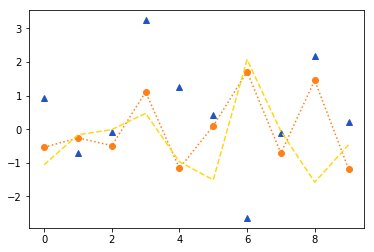

In [33]:
plt.plot(df.iloc[:10,1], color='#FF8016', marker='o', linestyle=':')
plt.plot(df.iloc[:10,2], color='#2353C0', marker='^', linestyle='')
plt.plot(df.iloc[:10,3], color='#FFD716', linestyle='--')
plt.show()

## Multiple Plots

matplotlib allows users to define the regions of their plotting canvas. If the user intends to create a canvas with multiple plots, they would use the `subplot()` function. The `subplot` function sets the number of rows and columns the canvas will have **AND** sets the current index of where the next subplot will be rendered.

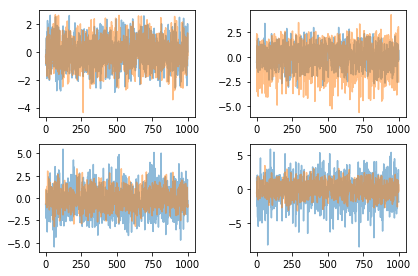

In [34]:
plt.figure(1)
# two row, two columns, first index (top-left)
plt.subplot(221)
plt.plot(df.loc[:,['se', 'yy']], alpha=0.5)

plt.subplot(222)
plt.plot(df.loc[:,['va','xg']], alpha=0.5)

plt.subplot(223)
plt.plot(df.iloc[:,8:10], alpha=0.5)

plt.subplot(224)
plt.plot(df.iloc[:,:2], alpha=0.5)

plt.subplots_adjust(top=.92, bottom=.08, left=.1, right=.95, hspace=.25, wspace=.35)
plt.show()

Text(0,0.5,'counts')

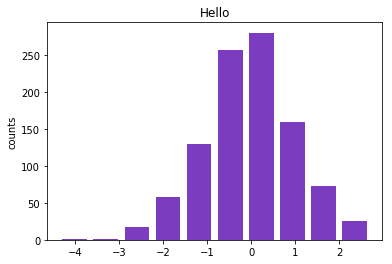

In [35]:
n, bins, patches = plt.hist(df.yy, facecolor='#5A0BB0', alpha=0.8, rwidth=.8, align='mid')
plt.title("Hello")
plt.ylabel('counts')

The biggest issue with `matplotlib` isn't its lack of power...it is that it is too much power. With great power, comes great responsibility. When you are quickly exploring data, you don't want to have to fiddle around with axis limits, colors, figure sizes, etc. Yes, you *can* make good figures with `matplotlib`, but you probably won't.

## Using pandas `.plot()`

Pandas abstracts some of those initial issues with data visualization. However, it is still `matplotlib`-esque.</br></br>
Pandas is built off of `numpy` for its caclulations, but its plotting is built off of `matplotlib`. Therefore, just like any data you get from `pandas` can be used within `numpy`, every plot that is returned from `pandas` is a `matplotlib` plot...and subject to `matplotlib` modification.

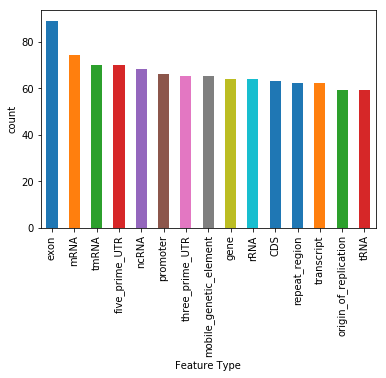

In [36]:
ax = df.feature_type.value_counts(sort=True).plot.bar()
ax.set_ylabel('count')
ax.set_xlabel('Feature Type')
plt.show()

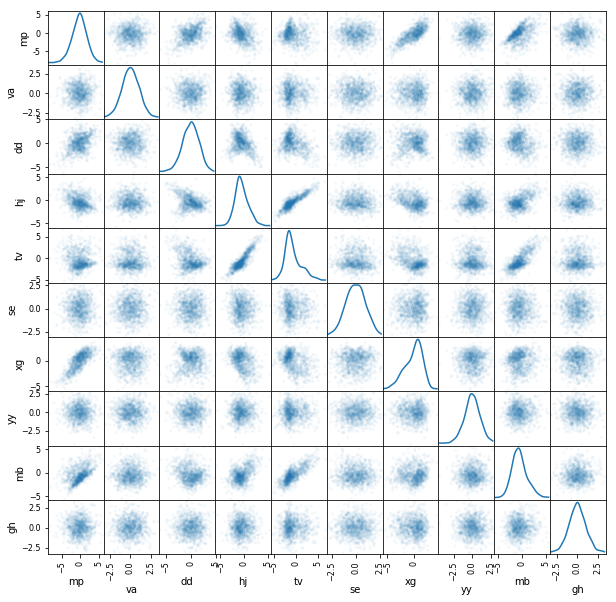

In [37]:
ax = pd.plotting.scatter_matrix(df, alpha = 0.05, figsize=(10,10), 
                                diagonal='kde')

# Seaborn

Seaborn is a library that specializes in making *prettier* `matplotlib` plots of statistical data. There was a brief introduction to seaborn in the last class, which we will re-create here.

In [38]:
import seaborn as sns

In [39]:
sns.set(style='whitegrid')

## Violin plot

Fancier box plot that gets rid of the need for 'jitter' to show the inherent distribution of the data points

/root/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


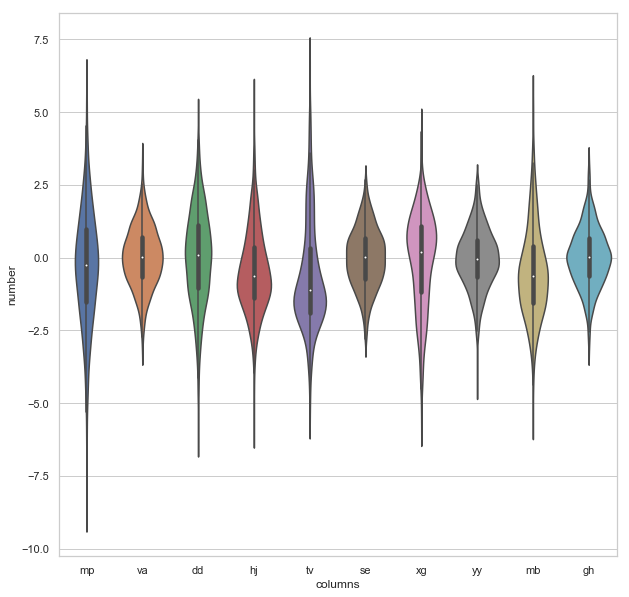

In [40]:
fig, axes = plt.subplots(figsize=(10, 10))
sns.violinplot(data=df.iloc[:,:-1], ax=axes)
axes.set_ylabel('number')
axes.set_xlabel('columns')
plt.show()

## Distplot

/root/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


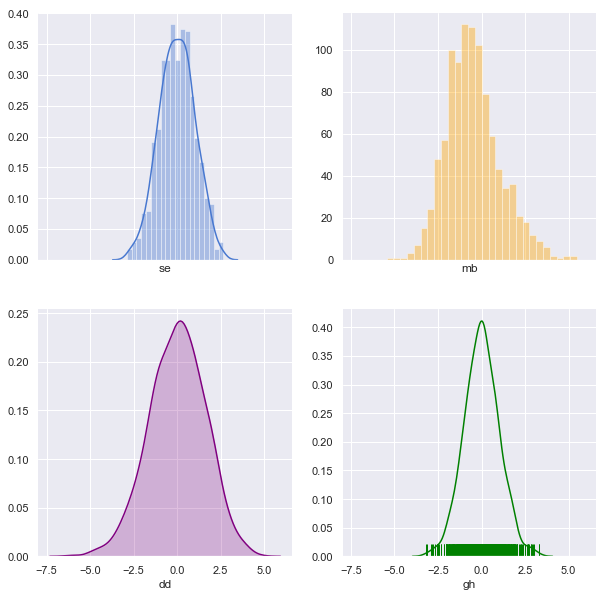

In [41]:
sns.set(palette='muted')

f, axes = plt.subplots(2,2, figsize=(10,10), sharex=True)
sns.despine(left=True)

sns.distplot(df.iloc[:, nr.randint(0,len(df.columns)-1)], ax=axes[0,0])
sns.distplot(df.iloc[:, nr.randint(0,len(df.columns)-1)], kde=False, ax=axes[0,1], color='orange')
sns.distplot(df.iloc[:, nr.randint(0,len(df.columns)-1)], hist=False, kde_kws={'shade':True}, ax=axes[1,0], color='purple')
sns.distplot(df.iloc[:, nr.randint(0,len(df.columns)-1)], hist=False, rug=True, ax=axes[1,1], color='green')

## Hexbin with marginal distributions

In [42]:
sns.set(style='ticks')

/root/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


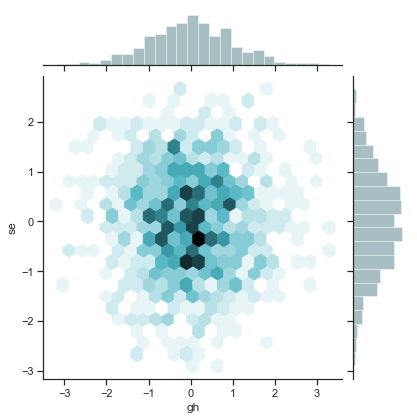

In [43]:
sns.jointplot(df.iloc[:,nr.randint(0, len(df.columns)-1)], 
              df.iloc[:,nr.randint(0, len(df.columns)-1)], 
              kind='hex', color= '#246068')

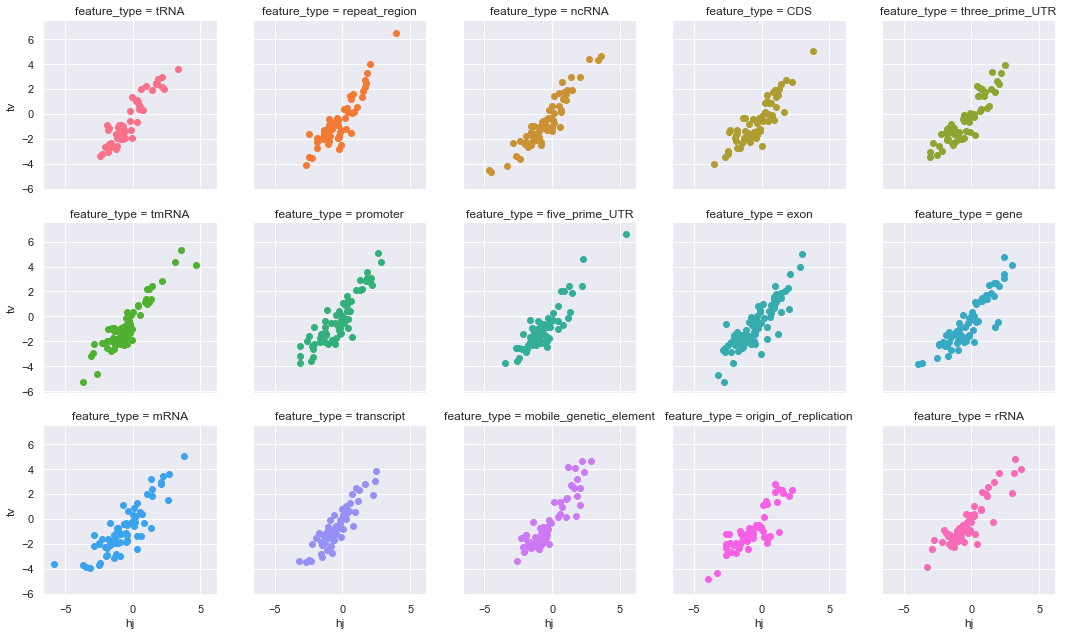

In [44]:
sns.set()

g = sns.FacetGrid(df.loc[:,['hj','feature_type', 'tv']], col='feature_type', hue='feature_type', col_wrap=5)
g.map(plt.scatter, 'hj', 'tv')